# ***`1.1 Entropia Funciones Notebook`***


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("tennis_dataset 1.csv")

In [7]:
def calcular_entropia(columna):
    valores, cuentas = np.unique(columna, return_counts=True)
    probabilidades = cuentas / cuentas.sum()
    entropia = -np.sum(probabilidades * np.log2(probabilidades))
    return entropia

def entropias_categoricas(df):
    entropias = {}
    for col in df.columns:
        if df[col].dtype == 'object':  # solo columnas categóricas
            entropias[col] = calcular_entropia(df[col])
    return pd.DataFrame(list(entropias.items()), columns=["Variable", "Entropía"])


# Calcular entropías solo de las categóricas
df_entropias = entropias_categoricas(df)

# Mostrar tabla
print(df_entropias)

      Variable  Entropía
0      Outlook  1.577406
1  Temperature  1.556657
2     Humidity  1.000000
3         Wind  0.985228
4         Play  0.940286


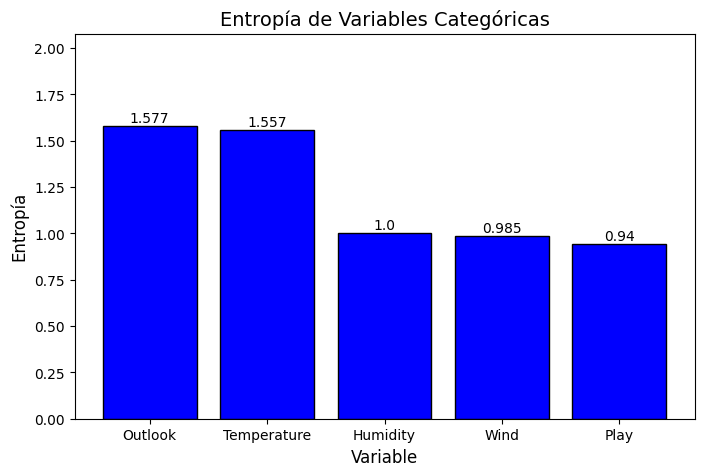

In [10]:
plt.figure(figsize=(8,5))
plt.bar(df_entropias["Variable"], df_entropias["Entropía"], color="blue", edgecolor="black")
plt.title("Entropía de Variables Categóricas", fontsize=14)
plt.xlabel("Variable", fontsize=12)
plt.ylabel("Entropía", fontsize=12)
plt.ylim(0, max(df_entropias["Entropía"])+0.5)

# Mostrar los valores encima de las barras
for i, val in enumerate(df_entropias["Entropía"]):
    plt.text(i, val+0.02, round(val, 3), ha='center')

plt.show()

# ***`1.2 Multipicadores de Lagrange: Valores maximos de la entropia.`***

In [13]:
def resumen_entropias_categoricas(df):
    filas = []
    for col in df.columns:
        if df[col].dtype == 'object':
            ent = calcular_entropia(df[col])
            k = df[col].nunique(dropna=True)
            hmax = np.log2(k) if k > 0 else 0.0
            pct = (ent / hmax * 100) if hmax > 0 else np.nan
            filas.append({
                "Variable": col,
                "k (categorías)": k,
                "Entropía (H)": ent,
                "H_max = log2(k)": hmax,
                "H / H_max (%)": round(pct, 2)
            })
    return pd.DataFrame(filas)


df_resumen = resumen_entropias_categoricas(df)
print(df_resumen.to_string(index=False))


   Variable  k (categorías)  Entropía (H)  H_max = log2(k)  H / H_max (%)
    Outlook               3      1.577406         1.584963          99.52
Temperature               3      1.556657         1.584963          98.21
   Humidity               2      1.000000         1.000000         100.00
       Wind               2      0.985228         1.000000          98.52
       Play               2      0.940286         1.000000          94.03
